In [ ]:

! pip3 install torchtext==0.6.0


     |████████████████████████████████| 71kB 3.2MB/s 
     |████████████████████████████████| 1.1MB 12.1MB/s 
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [ ]:

INDEBUG = False

import matplotlib.pyplot as pyplot
import numpy
import pandas
import platform
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import torch
import torchtext
from packaging import version

out = f'------------- version -------------\n'
out += f'python: {platform.python_version()}\n'
out += f'spacy: {spacy.__version__}\n'
out += f'torch: {torch.__version__}\n'
out += f'torchtext: {torchtext.__version__}\n'

print(out)

assert(version.parse(torchtext.__version__) >= version.parse('0.6.0'))

pandas.set_option('display.max_colwidth', None)

batch_size = 64


------------- version -------------
python: 3.6.9
spacy: 2.2.4
torch: 1.5.1+cu101
torchtext: 0.6.0



In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# %env JOBLIB_TEMP_FOLDER=/tmp


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

def shape(a, msg = 'here'):
    print(f'SHAPE > {msg}:\t{a.shape}')

a = torch.tensor([0, 1, 2])
shape(a, 'before use')

def debug(fun, arg, indebug = INDEBUG):
    if indebug:
        fun(*arg)

debug(shape, (a, 'in debug'), True)

def report_in_training(epoch, total_epoch, done, total):
    print('', end = '\r')
    print(f'epoch\t{epoch}/{total_epoch}:\t{done * 100.0 / total: .2f}% 👈', end = '')

def report_training(epoch, total_epoch, loss_train, loss_validation, accuracy_train, accuracy_validation, medal = False):
    print('', end = '\r')
    print(f'epoch\t{epoch}/{total_epoch}:\ttrain loss = {loss_train: .4f}, validation loss = {loss_validation: .4f}; train accuracy = {accuracy_train * 100: .2f}%, validation accuracy = {accuracy_validation * 100: .2f}%{" 🥇" if medal else ""}')

import time

for epoch in range (3):
    for i in range(6):
        report_in_training(epoch + 1, 3, i + 1, 9)
        time.sleep(1)
    report_training(epoch + 1, 3, 1.1, 1.2, 0.936, 0.89898, epoch == 1)

def report_in_test(done, total):
    print('', end = '\r')
    print(f'test:\t{done * 100.0 / total: .2f}% 👈', end = '')

def report_test(loss, accuracy, medal = False):
    print('', end = '\r')
    print(f'test:\tloss = {loss: .4f}, accuracy = {accuracy * 100: .2f}%{" 🥇" if medal else ""}')

for i in range(6):
    report_in_test(i + 1, 9)
    time.sleep(1)
report_test(1.936, 0.89898, True)


SHAPE > before use:	torch.Size([3])
SHAPE > in debug:	torch.Size([3])
epoch	1/3:	train loss =  1.1000, validation loss =  1.2000; train accuracy =  93.60%, validation accuracy =  89.90%
epoch	2/3:	train loss =  1.1000, validation loss =  1.2000; train accuracy =  93.60%, validation accuracy =  89.90% 🥇
epoch	3/3:	train loss =  1.1000, validation loss =  1.2000; train accuracy =  93.60%, validation accuracy =  89.90%
test:	loss =  1.9360, accuracy =  89.90% 🥇


In [ ]:

home_huffpost = '/content/drive/My Drive/Colab Notebooks/kaggle/'

data_pandas = pandas.read_json(home_huffpost + 'News_Category_Dataset_v2.json', dtype = {'category': 'category'}, lines = True) #('../input/news-category-dataset/News_Category_Dataset_v2.json', lines = True)
data_pandas = data_pandas.sample(frac = 1.0)

print(f'data shape:\t{data_pandas.shape}')
data_pandas.head(9)


data shape:	(200853, 6)


category  ...       date
4121    ENTERTAINMENT  ... 2018-03-12
112764         SPORTS  ... 2014-09-06
67729        POLITICS  ... 2016-02-02
108988   QUEER VOICES  ... 2014-10-19
47253        POLITICS  ... 2016-09-22
101180  ENTERTAINMENT  ... 2015-01-17
137653       WELLNESS  ... 2013-12-02
67332          SPORTS  ... 2016-02-06
148519       WELLNESS  ... 2013-08-09

[9 rows x 6 columns]

In [ ]:

# merge 'THE WORLDPOST' and 'WORLDPOST', which are the same category:
data_pandas.loc[data_pandas['category'] == 'THE WORLDPOST', ['category']] = 'WORLDPOST'
assert(data_pandas[data_pandas['category'] == 'THE WORLDPOST'].shape[0] == 0)

# data_pandas[data_pandas['category'] == 'POLITICS'].shape[0]
# data_pandas = data_pandas.drop(data_pandas[data_pandas['category'] == 'POLITICS'].index)
# data_pandas[data_pandas['category'] == 'POLITICS'].shape[0]


In [ ]:

category = list(data_pandas.category.factorize()[1])
print(f'there are {len(category)} categories:\n', '\n'.join(category))

# todo map text label to num label


there are 40 categories:
 ENTERTAINMENT
SPORTS
POLITICS
QUEER VOICES
WELLNESS
STYLE & BEAUTY
ENVIRONMENT
FOOD & DRINK
CRIME
WOMEN
WORLDPOST
TRAVEL
WORLD NEWS
RELIGION
COMEDY
IMPACT
HEALTHY LIVING
WEDDINGS
SCIENCE
TECH
PARENTS
HOME & LIVING
BUSINESS
GREEN
TASTE
LATINO VOICES
ARTS & CULTURE
PARENTING
MEDIA
DIVORCE
BLACK VOICES
FIFTY
EDUCATION
STYLE
WEIRD NEWS
CULTURE & ARTS
ARTS
COLLEGE
MONEY
GOOD NEWS


In [ ]:

data_pandas.category.astype('category')

# data_pandas[data_pandas.category.isnull()]

data_pandas['label'] = data_pandas.category.factorize()[0]
data_pandas['label'].astype('category')
data_pandas['text'] = 'By ' + data_pandas.authors + ' : ' + data_pandas.headline + ' : ' + data_pandas.short_description + ' ~ ' + data_pandas.authors # important thing repeats

huffpost_headline_csv = home_huffpost + 'huffpost_headline.csv'

data_pandas[['text', 'label']].to_csv(huffpost_headline_csv, index = False)

data_pandas.head(9)


category  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          text
4121    ENTERTAINMENT  ...                                                                                                                                                                                                                                                                                                                                                                                                By Bill Bradley : 'Walking Dead' Fan Notices Hilariously Obvious Pattern : This is not what the doctor ordered. ~ Bill Bradley
112764         SPORTS  ...                                                                                                                                                                                                                                                                                                                                                                                                                             By Chris Greenberg : Martina Navratilova Proposes To Girlfriend At U.S. Open :  ~ Chris Greenberg
67729        POLITICS  ...                                                                                                                                                                                                                                                                                                                                                                                 By Nadya Agrawal, Guest Writer : Mike Huckabee Suspends 2016 Presidential Campaign : He entered the race May 5. ~ Nadya Agrawal, Guest Writer
108988   QUEER VOICES  ...                                                                                                                                                                                                                                                                                                                                                                                                            By JamesMichael Nichols : After Dark: Meet Kayvon Zand, Artist And Nightlife Personality :  ~ JamesMichael Nichols
47253        POLITICS  ...                                                                                                                                                                                                                                                                                                         By  : Image Purported To Be Michelle Obama's Passport Posted Online : “We’re aware of those media reports, and it is something we’re looking into,” U.S. Attorney General Loretta Lynch said at a news conference. ~ 
101180  ENTERTAINMENT  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   By  : Andi Dorfman Breaks Her Silence :  ~ 
137653       WELLNESS  ...  By Craig K. Comstock, Contributor\nauthor, TV host, social commentator, former foundation director : Transform While There's Still Time : The mission is to prepare people before their world falls apart, so they won't be surpri

In [ ]:

data_pandas_csv = pandas.read_csv(huffpost_headline_csv, dtype={'category': 'category', 'label' : 'category'})

print(f'data shape:\t{data_pandas_csv.shape}')
data_pandas_csv.head(9)


data shape:	(200853, 2)


text label
0                                                                                                                                                                                                                                                                                                                                                                                                By Bill Bradley : 'Walking Dead' Fan Notices Hilariously Obvious Pattern : This is not what the doctor ordered. ~ Bill Bradley     0
1                                                                                                                                                                                                                                                                                                                                                                                                                             By Chris Greenberg : Martina Navratilova Proposes To Girlfriend At U.S. Open :  ~ Chris Greenberg     1
2                                                                                                                                                                                                                                                                                                                                                                                 By Nadya Agrawal, Guest Writer : Mike Huckabee Suspends 2016 Presidential Campaign : He entered the race May 5. ~ Nadya Agrawal, Guest Writer     2
3                                                                                                                                                                                                                                                                                                                                                                                                            By JamesMichael Nichols : After Dark: Meet Kayvon Zand, Artist And Nightlife Personality :  ~ JamesMichael Nichols     3
4                                                                                                                                                                                                                                                                                                         By  : Image Purported To Be Michelle Obama's Passport Posted Online : “We’re aware of those media reports, and it is something we’re looking into,” U.S. Attorney General Loretta Lynch said at a news conference. ~      2
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   By  : Andi Dorfman Breaks Her Silence :  ~      0
6  By Craig K. Comstock, Contributor\nauthor, TV host, social commentator, former foundation director : Transform While There's Still Time : The mission is to prepare people before their world falls apart, so they won't be surprised and fall into panic and traumatic depression. Carolyn Baker's dream is that a better society will arise as we wisely prepare for and resiliently move through a period of suffering. ~ Craig K. Comstock, Contributor\nauthor, TV host, social commentator, former foundation director     4
7                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f'running on {"CUDA" if torch.cuda.is_available() else "NOCUDA"}')


running on CUDA


In [ ]:

%%time

'''
see: https://pytorch.org/text/data.html
'''

seq_len = 32 # 96 # 256

class Data():

    def __init__(self, path, embedding = 'glove.6B.100d', batch_size = 64, seq_len = 128, tokenizer = 'spacy', lang = 'en'):
        self.path = path
        self.iter_train = self.iter_val = self.iter_test = None
        self.seq_len = seq_len
        self.tokenizer = tokenizer
        self.lang = lang
        self.batch_size = batch_size
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.label = {}
        self.embedding = embedding #'fasttext.en.300d' # 'glove.6B.100d' 'glove.twitter.27B.100d'
        self.dim_embedding = -1
        self.vocab = None
        self.size_train = self.size_val = self.size_test = -1

    def load(self):
        field_text = torchtext.data.Field(sequential = True, fix_length = self.seq_len, lower = True, tokenize = self.tokenizer, tokenizer_language = self.lang, batch_first = True, pad_first = True, stop_words = STOP_WORDS) # torchtext.data.Field(sequential = True, fix_length = 128, lower = True, tokenize = 'spacy'self.tokenizer, tokenizer_language = 'en', batch_first = True)
        field_label = torchtext.data.Field(sequential = False, use_vocab = False, batch_first = True, unk_token = None, is_target = True)
        dataset = torchtext.data.TabularDataset(path = self.path, format = 'CSV', fields = {'text': ('text', field_text),
                                                                                            'label': ('label', field_label)})
        dataset_train, dataset_val, dataset_test = dataset.split(split_ratio = [0.6, 0.2, 0.2])
        field_text.build_vocab(dataset_train, vectors = self.embedding)
        field_text.vocab.vectors.unk_init = torch.nn.init.xavier_uniform
        self.vocab = field_text.vocab
        # field_label.build_vocab(dataset_train, vectors = self.embedding)
        # field_label.vocab.vectors.unk_init = torch.nn.init.xavier_uniform
        # self.label = field_label.vocab.stoi
        self.dim_embedding = len(field_text.vocab)
        self.iter_train = torchtext.data.BucketIterator(dataset_train, batch_size = self.batch_size, train = True, repeat = False, shuffle = True, sort = False, device = self.device) # repeat with True will make a never-end iter
        self.iter_val = torchtext.data.Iterator(dataset_val, batch_size = self.batch_size, train = False, repeat = False, shuffle = True, sort = False, device = self.device)
        self.iter_test = torchtext.data.Iterator(dataset_test, batch_size = self.batch_size, train = False, repeat = False, shuffle = True, sort = False, device = self.device)
        debug(print, (f'DATASET TRAIN:\t{dataset_train[3].text}\t→\t{dataset_train[3].label}\nLABEL:\t{self.label}'), indebug = True)
        self.size_train, self.size_val, self.size_test = self.batch_size * len(self.iter_train), self.batch_size * len(self.iter_val), self.batch_size * len(self.iter_test)

    def get_iter_train(self):
        r = None
        if self.iter_train: self.iter_train.init_epoch()
        else: self.load()
        r = self.iter_train
        return r

    def get_iter_val(self):
        r = None
        if self.iter_val: self.iter_val.init_epoch()
        else: self.load()
        r = self.iter_val
        return r

    def get_iter_test(self):
        r = None
        if self.iter_test: self.iter_test.init_epoch()
        else: self.load()
        r = self.iter_test
        return r

    def get_size_train(self):
        if self.size_train < 0: self.load()
        return self.size_train

    def get_size_val(self):
        if self.size_val < 0: self.load()
        return self.size_val

    def get_size_test(self):
        if self.size_test < 0: self.load()
        return self.size_test

def spacy_tokenizer():
    _spacy = spacy.load('en')
    return lambda text: [token.text for token in _spacy.tokenizer(text)]

path_data = huffpost_headline_csv

data = Data(path_data, 'glove.twitter.27B.50d', seq_len = seq_len, batch_size = batch_size) # 'glove.6B.50d' # 'glove.twitter.27B.25d' # 'glove.twitter.27B.100d' # https://pytorch.org/text/vocab.html#torchtext.vocab.Vocab.load_vectors


CPU times: user 94 µs, sys: 0 ns, total: 94 µs
Wall time: 99.2 µs


In [ ]:

%%time

data.load()


.vector_cache/glove.twitter.27B.zip: 1.52GB [11:41, 2.17MB/s]                            
100%|█████████▉| 1191040/1193514 [00:44<00:00, 26579.23it/s]

D A T A S E T   T R A I N : 	 [ ' j e n n i f e r ' ,   ' b e n d e r y ' ,   ' : ' ,   ' j a c k ' ,   ' l e w ' ,   ' d e f e n d s ' ,   ' e f f o r t s ' ,   ' h e l p ' ,   ' b a n k s ' ,   ' p r o c e s s ' ,   ' m a r i j u a n a ' ,   ' s a l e s ' ,   ' : ' ,   '   ' ,   ' ~ ' ,   ' j e n n i f e r ' ,   ' b e n d e r y ' ] 	 → 	 2 
 L A B E L : 	 { }
CPU times: user 3min 13s, sys: 14.3 s, total: 3min 27s
Wall time: 15min 28s


In [ ]:

print(f'---------------------- size ----------------------\ntrain\tvalidation\ttest\n \
    {batch_size: 3d} x {len(data.get_iter_train()): 6d} = {data.get_size_train(): 9d}\t \
    {batch_size: 3d} x {len(data.get_iter_val()): 6d} = {data.get_size_val(): 9d}\t \
    {batch_size: 3d} x {len(data.get_iter_test()): 6d} = {data.get_size_test(): 9d}\n')


---------------------- size ----------------------
train	validation	test
      64 x   1883 =    120512	      64 x    628 =     40192	      64 x    628 =     40192




关于LSTM的输出，这里是多对一分类（RNN分类类型见下图），根据`torch.nn.LSTM`的说明，其输出为$ ( \text{seq_len}, \text{batch}, \text{num_directions} \times \text{hidden_size} ) $形状的张量（这里采用batch_first：**If True, then the input and output tensors are provided as (batch, seq, feature).**），这里的$ \text{seq_len} $对应下图中的$ x^{ \langle T_x \rangle } $里的$ \langle T_x \rangle $。



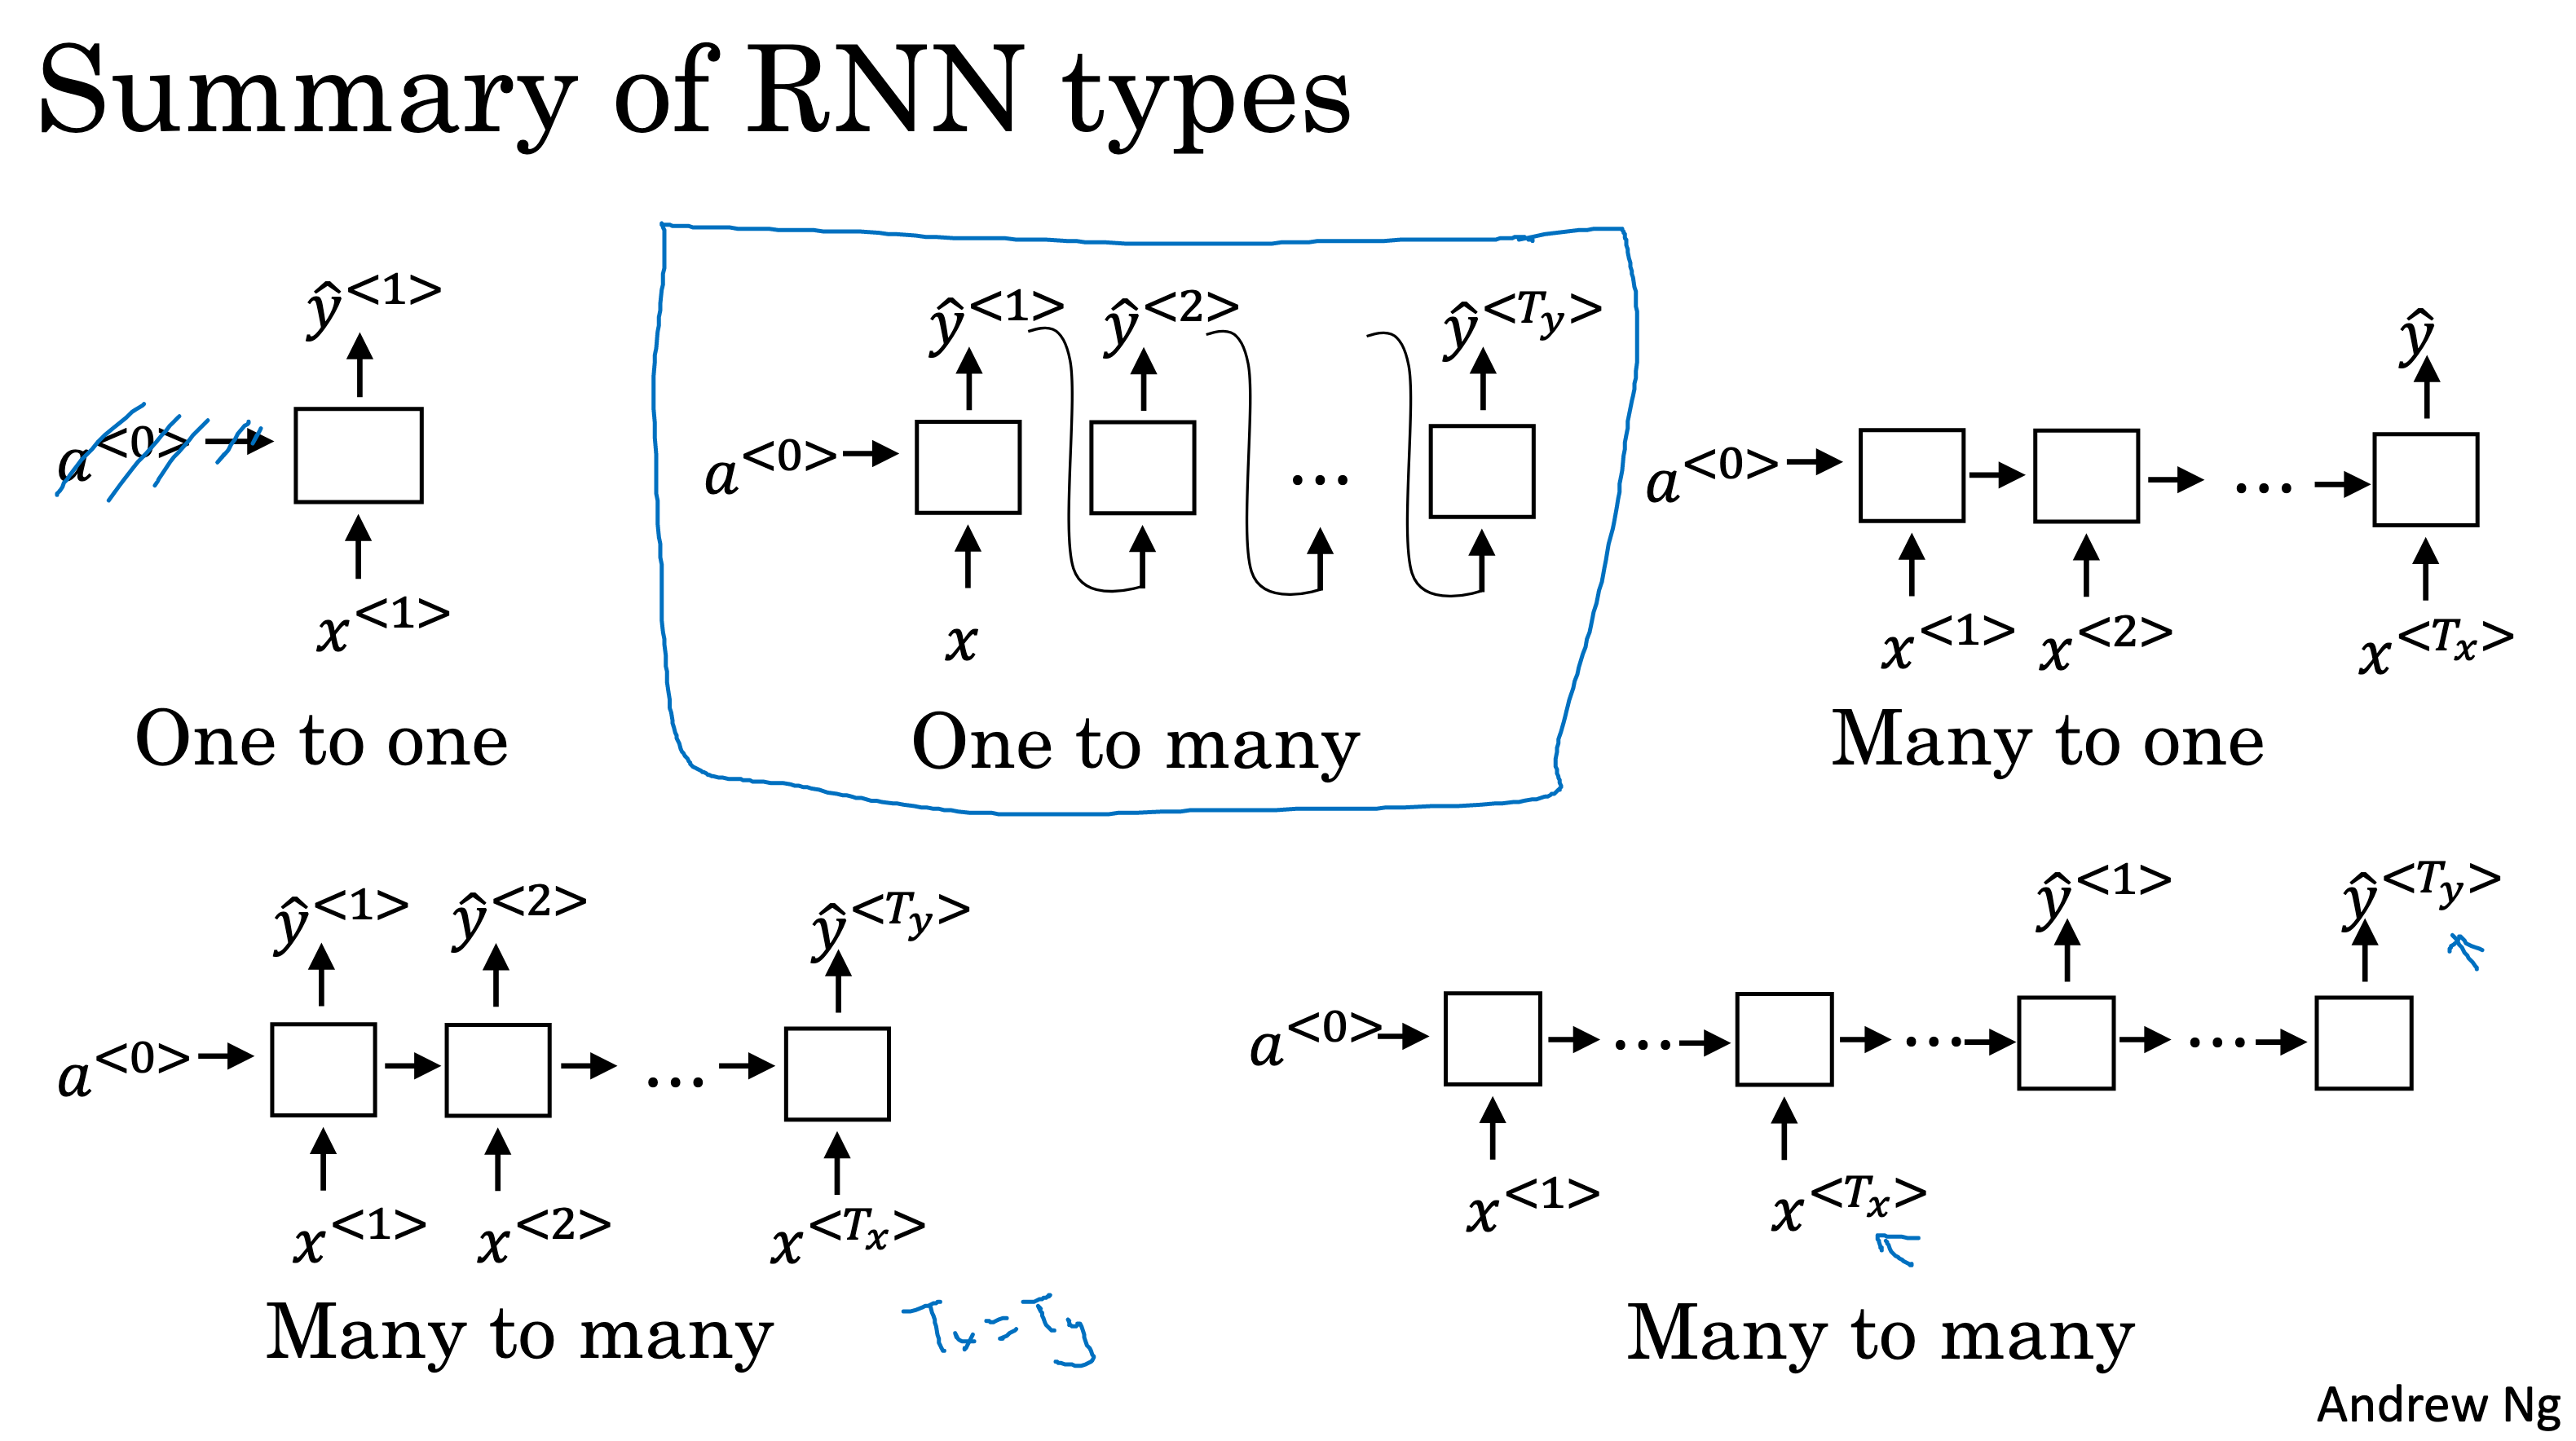


In [ ]:

class Cla(torch.nn.Module):

    def __init__(self, vocab: torchtext.vocab, output_size, hidden_dim, n_layers, bidirectional = False, drop_prob = 0.382):
        super().__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.vocab = vocab
        # define all layers
        debug(shape, (self.vocab.vectors, 'in Cla constructor'))
        self.embedding = torch.nn.Embedding(*self.vocab.vectors.shape)
        self.embedding.weight.data.copy_(vocab.vectors) # load pre-trained embedding vector
        self.lstm = torch.nn.LSTM(self.vocab.vectors.shape[1], hidden_dim, n_layers, batch_first = True, dropout = drop_prob, bidirectional = bidirectional)
        self.direction = 2 if bidirectional else 1
        self.dropout = torch.nn.Dropout(p = drop_prob)
        self.fc = torch.nn.Linear(hidden_dim * self.direction, output_size)
        self.out = torch.nn.LogSoftmax(dim = -1) # may use 2: 2 means Softmax will compute along the 2nd dim of the input; after fc x.shape: torch.Size([64, 300, 42])

    def forward(self, x, hidden):
        debug(shape, (x, 'x as forward input'))
        debug(shape, (hidden[0], 'h0 as forward input'))
        debug(shape, (hidden[1], 'h1 as forward input'))
        batch_size = x.shape[0] # todo abstract batch_size
        x = self.embedding(x)
        debug(shape, (x, 'x after embedding'))
        x, hidden = self.lstm(x, hidden)
        # stack up lstm outputs
        debug(shape, (x, 'x after lstm'))
        x = x.contiguous()
        debug(shape, (x, 'x after contiguous'))
        x = x.view(-1, self.hidden_dim * self.direction) # todo check: self.hidden_dim * 2 for bidirection?
        debug(shape, (x, 'x after resize'))
        x = self.dropout(x)
        debug(shape, (x, 'x after dropout'))
        x = self.fc(x)
        debug(shape, (x, 'x after fc'))
        q = self.out(x)
        debug(shape, (q, 'q'))
        debug(print, (f'q[0]:\n{q[0]}'))
        q = q.view(batch_size, -1, self.output_size)[ : , -1, : ]
        return q, hidden

    def init_hidden(self, batch_size):
        h = torch.rand((self.n_layers * self.direction, batch_size, self.hidden_dim), dtype = torch.float, device = device, requires_grad = True)
        c = torch.rand((self.n_layers * self.direction, batch_size, self.hidden_dim), dtype = torch.float, device = device, requires_grad = True)
        hidden = (h, c)
        return hidden



#参数

##glove.6B.50d

| test accuracy | epochs | hidden-dim | layers | dropout |
|:-------------:|:------:|:----------:|:------:|:-------:|
|     65.81%    |   64   |     32     |    1   |  0.382  |
| 72.61%        | 64     | 128        | 2      | 0.382   |
| 68.23%        | 64     | 128        | 4      | 0.382   |
| 70.67%        | 64     | 128        | 3      | 0.382   |
| 69.33%        | 64     | 128        | 3      | 0.5     |
| 73.78%        | 64     | 128        | 2      | 0.1     |
| 75.15%        | 96     | 128        | 2      | 0.1     |


In [ ]:

output_size = len(category) # len(data.label)
hidden_dim = 128 #64 #128 #256 #512
n_layers = 2

cla = Cla(data.vocab, output_size, hidden_dim, n_layers, bidirectional = True, drop_prob = 0.1)

print(cla)


Cla(
  (embedding): Embedding(87715, 50)
  (lstm): LSTM(50, 128, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc): Linear(in_features=256, out_features=40, bias=True)
  (out): LogSoftmax()
)


In [ ]:

# loss and optimization functions
lr = 0.001

criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(cla.parameters(), lr = lr)


epoch	1/64:	 3.04% 👈

100%|█████████▉| 1191040/1193514 [01:00<00:00, 26579.23it/s]

epoch	1/64:	train loss =  2.9973, validation loss =  2.6651; train accuracy =  23.55%, validation accuracy =  30.83% 🥇
epoch	2/64:	train loss =  2.4383, validation loss =  2.2593; train accuracy =  35.17%, validation accuracy =  40.69% 🥇
epoch	3/64:	train loss =  2.1495, validation loss =  1.9804; train accuracy =  41.48%, validation accuracy =  46.36% 🥇
epoch	4/64:	train loss =  1.8595, validation loss =  1.8054; train accuracy =  48.46%, validation accuracy =  50.08% 🥇
epoch	5/64:	train loss =  1.7367, validation loss =  1.6956; train accuracy =  51.97%, validation accuracy =  53.18% 🥇
epoch	6/64:	train loss =  1.5736, validation loss =  1.5658; train accuracy =  55.81%, validation accuracy =  56.38% 🥇
epoch	7/64:	train loss =  1.4830, validation loss =  1.4470; train accuracy =  58.48%, validation accuracy =  59.23% 🥇
epoch	8/64:	train loss =  1.3747, validation loss =  1.3807; train accuracy =  61.65%, validation accuracy =  61.25% 🥇
epoch	9/64:	train loss =  1.3065, validation los

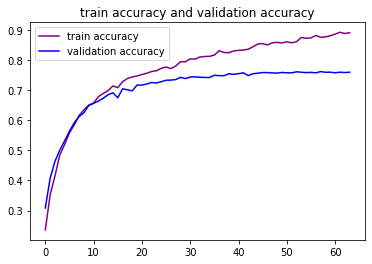

CPU times: user 9min 44s, sys: 1min 34s, total: 11min 19s
Wall time: 11min 21s


In [ ]:

############## train ##############

%%time

# training params

epochs = 64
runno = 128 #128 #639 #369 # float('inf')
clip = 6 # gradient clipping

# move model to GPU, if available
cla.to(device)

cla.train()
model, lowest_val_loss = home_huffpost + 'huffpost_headline.torm', float('inf')
# train for some number of epochs
loss_train, loss_val = [], []
accuracy_train, accuracy_val = [], []
for e in range(epochs):
    # initialize hidden state
    # h = cla.init_hidden(batch_size) # todo remove me
    # batch loop
    done, total = 0, batch_size * runno + data.get_size_val()
    num_correct_train, num_correct_val = 0.0, 0.0
    report_in_training(e + 1, epochs, done, total)
    c, loss_batch = 0, 0.0
    for X, y in data.get_iter_train():
        if X.shape[0] < data.batch_size: break
        c += 1
        if c > runno: break
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = cla.init_hidden(X.shape[0]) # (h[0].detach(), h[1].detach()) # tuple([each.data for each in h])
        # zero accumulated gradients
        cla.zero_grad()
        # get the output from the model
        q, h = cla(X, h)
        yhat = q.argmax(dim = -1)
        correct_tensor = yhat.eq(y)
        num_correct_train += correct_tensor.sum()
        # calculate the loss and perform backprop
        debug(shape, (q, 'cla.forward output'))
        debug(shape, (y, 'label'))
        loss = criterion(q, y)
        loss_batch += loss.item()
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm_(cla.parameters(), clip)
        optimizer.step()
        done += batch_size
        report_in_training(e + 1, epochs, done, total)
    # loss stats
    loss_train.append(loss_batch / c)
    accuracy_train.append(num_correct_train / (batch_size * runno))
    # Get validation loss
    c, loss_batch = 0, 0.0
    cla.eval()
    for X, y in data.get_iter_val():
        if X.shape[0] < data.batch_size: break
        c += 1
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        val_h = cla.init_hidden(X.shape[0]) # tuple([each.data for each in val_h])
        q, val_h = cla(X, val_h)
        yhat = q.argmax(dim = -1)
        correct_tensor = yhat.eq(y)
        num_correct_val += correct_tensor.sum()
        loss = criterion(q, y)
        loss_batch += loss.item()
        done += batch_size
        report_in_training(e + 1, epochs, done, total)
    loss_val.append(loss_batch / c)
    accuracy_val.append(num_correct_val / (data.get_size_val() - data.get_size_val() % data.batch_size))
    cla.train()
    bet = False
    if lowest_val_loss > loss_val[-1]:
        torch.save(cla.state_dict(), model)
        lowest_val_loss = loss_val[-1]
        bet = True
    report_training(e + 1, epochs, loss_train[-1], loss_val[-1], accuracy_train[-1], accuracy_val[-1], bet)

pyplot.figure()
pyplot.title('train loss and validation loss')
pyplot.plot(range(epochs), loss_train, 'purple', label = 'train loss')
pyplot.plot(range(epochs), loss_val, 'blue', label = 'validation loss')
pyplot.legend()

pyplot.show()

pyplot.figure()
pyplot.title('train accuracy and validation accuracy')
pyplot.plot(range(epochs), accuracy_train, 'purple', label = 'train accuracy')
pyplot.plot(range(epochs), accuracy_val, 'blue', label = 'validation accuracy')
pyplot.legend()

pyplot.show()


In [ ]:

############## test ##############

%%time

def test():
    loss_test = [] # track loss
    num_correct = 0.0

    cla = Cla(data.vocab, output_size, hidden_dim, n_layers, bidirectional = True, drop_prob = 0.1)
    cla.load_state_dict(torch.load(model))
    cla.to(device)

    cla.eval()
    # iterate over test data
    for X, y in data.get_iter_test():
        if X.shape[0] < data.batch_size: break
        # if c > runno: break
        # create new variables for the hidden state, otherwise pytorch would backprop through the entire training history
        h = cla.init_hidden(X.shape[0]) # tuple([each.data for each in h])
        # get predicted outputs
        q, h = cla(X, h)
        # compare predictions to true label
        yhat = q.argmax(dim = -1) # there is <oov> category with the index 0 # yhat = q.argsort(dim = -1)[ : , -2]
        correct_tensor = yhat.eq(y)
        num_correct += correct_tensor.sum()
        # calculate loss
        test_loss = criterion(q, y)
        loss_test.append(test_loss.item())

    ######### -- stats! -- #########
    # accuracy over all test data
    accuracy_test = num_correct / (data.get_size_test() - data.get_size_test() % data.batch_size)
    report_test(numpy.mean(loss_test), accuracy_test, accuracy_test > 0.8)

test()


test:	loss =  0.8622, accuracy =  76.03%
CPU times: user 5.09 s, sys: 521 ms, total: 5.61 s
Wall time: 5.64 s




---




#Attention


In [ ]:

class Attention(torch.nn.Module):
    '''
    https://pytorch.org/docs/stable/notes/extending.html#extending-torch-nn
    https://www.aclweb.org/anthology/P16-2034.pdf
    '''

    def __init__(self, dim, bidirectional = True):
        super().__init__()
        self.weight = torch.nn.Parameter(torch.rand(dim))
        self.direction = 2 if bidirectional else 1 

    def forward(self, input):
        # LSTM doc: For the unpacked case, the directions can be separated using output.view(seq_len, batch, num_directions, hidden_size), with forward and backward being direction 0 and 1 respectively.
        H_forward = H_backward = None
        if self.direction > 1: H_forward, H_backward = input.select(2, 0), input.select(2, 1)
        else:
            H_forward = input
            H_backward = torch.zeros_like(H_forward)
        debug(shape, (H_forward, 'H_forward'))
        debug(shape, (H_backward, 'H_backward'))
        H = H_forward + H_backward # H is dw x T matrix. dw is the dimension of the word vectors.
        debug(shape, (H, 'H'))
        M = torch.tanh(H)
        debug(shape, (M, 'M'))
        debug(shape, (self.weight, 'w'))
        T = torch.matmul(M.transpose(1, 2), self.weight)
        debug(shape, (T, 'T'))
        alpha = torch.softmax(T, dim = -1) # w is dw-dimension trainable weight vector.
        debug(shape, (alpha, 'alpha'))
        r = torch.matmul(H, alpha.unsqueeze(-1))
        return r.squeeze(-1) # torch.tanh(r.squeeze(-1))

class Cla(torch.nn.Module):

    def __init__(self, vocab: torchtext.vocab, output_size, hidden_dim, n_layers, bidirectional = False, drop_prob = 0.382):
        super().__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.vocab = vocab
        self.direction = 2 if bidirectional else 1
        # define all layers
        debug(shape, (self.vocab.vectors, 'in Cla constructor'))
        self.embedding = torch.nn.Embedding(*self.vocab.vectors.shape)
        self.embedding.weight.data.copy_(vocab.vectors) # load pre-trained embedding vector
        self.lstm0 = torch.nn.LSTM(self.vocab.vectors.shape[1], hidden_dim, n_layers, batch_first = True, dropout = drop_prob, bidirectional = bidirectional)
        self.dropout0 = torch.nn.Dropout(p = drop_prob)
        self.attention = Attention(data.seq_len)
        self.lstm1 = torch.nn.LSTM(self.vocab.vectors.shape[1], hidden_dim, n_layers, batch_first = True, dropout = drop_prob, bidirectional = bidirectional)
        self.dropout1 = torch.nn.Dropout(p = drop_prob)
        self.fc = torch.nn.Linear(hidden_dim * self.direction, output_size) # self.fc = torch.nn.Linear(data.batch_size * data.seq_len, data.batch_size * output_size)
        self.out = torch.nn.LogSoftmax(dim = -1) # may use 2: 2 means Softmax will compute along the 2nd dim of the input; after fc x.shape: torch.Size([64, 300, 42])

    def forward(self, x, hidden):
        debug(shape, (x, 'x as forward input'))
        debug(shape, (hidden[0], 'h0 as forward input'))
        debug(shape, (hidden[1], 'h1 as forward input'))
        batch_size = x.shape[0] # todo abstract batch_size
        x = self.embedding(x)

        for i in range(1):
            xx = x.clone()
            debug(shape, (x, 'x before lstm0{i}'))
            x, hidden = self.lstm0(x, hidden)
            # stack up lstm outputs
            debug(shape, (x, 'x after lstm0{i}'))
            x = x.contiguous()
            debug(shape, (x, 'x after contiguous'))
            x = x.view(-1, self.hidden_dim * self.direction) # todo check: self.hidden_dim * 2 for bidirection?
            debug(shape, (x, 'x after resize'))
            x = self.dropout0(x)
            debug(shape, (x, 'x after dropout0{i}'))
            x = x.view(batch_size, data.seq_len, self.direction, -1)
            x = self.attention(x)
            debug(shape, (x, 'after attention{i}'))
            x = (xx.transpose(0, 2) * x.transpose(0, 1)).transpose(0, 2)

        debug(shape, (x, 'x before lstm1'))
        x, hidden = self.lstm1(x, hidden)
        # stack up lstm outputs
        debug(shape, (x, 'x after lstm1'))
        x = x.contiguous()
        debug(shape, (x, 'x after contiguous'))
        x = x.view(-1, self.hidden_dim * self.direction) # todo check: self.hidden_dim * 2 for bidirection?
        debug(shape, (x, 'x after resize'))
        x = self.dropout1(x)
        debug(shape, (x, 'x after dropout1'))

        x = self.fc(x)
        debug(shape, (x, 'x after fc'))
        q = self.out(x)
        debug(shape, (q, 'q'))
        debug(print, (f'q[0]:\n{q[0]}'))
        q = q.view(batch_size, -1, self.output_size)[ : , -1, : ]

        # x = x.view(-1)
        # x = self.fc(x)
        # debug(shape, (x, 'x after fc'))
        # x = x.view(data.batch_size, -1)
        # debug(shape, (x, 'x before out'))
        # q = self.out(x)
        # debug(shape, (q, 'q'))
        # debug(print, (f'q[0]:\n{q[0]}'))
        # q = q.view(batch_size, -1, self.output_size)[ : , -1, : ]
        
        return q, hidden

    def init_hidden(self, batch_size):
        h = torch.rand((self.n_layers * self.direction, batch_size, self.hidden_dim), dtype = torch.float, device = device, requires_grad = True)
        c = torch.rand((self.n_layers * self.direction, batch_size, self.hidden_dim), dtype = torch.float, device = device, requires_grad = True)
        hidden = (h, c)
        return hidden



#参数

##glove.6B.50d

| test accuracy | epochs | hidden-dim | layers | dropout |
|:-------------:|:------:|:----------:|:------:|:-------:|
|     65.81%    |   64   |     32     |    1   |  0.382  |
| 72.61%        | 64     | 128        | 2      | 0.382   |
| 68.23%        | 64     | 128        | 4      | 0.382   |
| 70.67%        | 64     | 128        | 3      | 0.382   |
| 69.33%        | 64     | 128        | 3      | 0.5     |
| 73.78%        | 64     | 128        | 2      | 0.1     |
| 75.15%        | 96     | 128        | 2      | 0.1     |


In [ ]:

output_size = len(category) # len(data.label)
hidden_dim = 64 #64 #128 #256 #512
n_layers = 2

cla = Cla(data.vocab, output_size, hidden_dim, n_layers, bidirectional = True, drop_prob = 0.1)

print(cla)


Cla(
  (embedding): Embedding(87715, 50)
  (lstm0): LSTM(50, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (dropout0): Dropout(p=0.1, inplace=False)
  (attention): Attention()
  (lstm1): LSTM(50, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (fc): Linear(in_features=128, out_features=40, bias=True)
  (out): LogSoftmax()
)


In [ ]:

# loss and optimization functions
lr = 0.001

criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(cla.parameters(), lr = lr)


epoch	1/64:	train loss =  2.9641, validation loss =  2.5436; train accuracy =  24.32%, validation accuracy =  34.26% 🥇
epoch	2/64:	train loss =  2.3376, validation loss =  2.1167; train accuracy =  37.56%, validation accuracy =  42.60% 🥇
epoch	3/64:	train loss =  1.9805, validation loss =  1.8904; train accuracy =  46.34%, validation accuracy =  49.10% 🥇
epoch	4/64:	train loss =  1.7499, validation loss =  1.6761; train accuracy =  51.35%, validation accuracy =  53.36% 🥇
epoch	5/64:	train loss =  1.6035, validation loss =  1.5645; train accuracy =  55.51%, validation accuracy =  56.05% 🥇
epoch	6/64:	train loss =  1.4822, validation loss =  1.4703; train accuracy =  58.45%, validation accuracy =  58.67% 🥇
epoch	7/64:	train loss =  1.3831, validation loss =  1.3978; train accuracy =  60.42%, validation accuracy =  60.43% 🥇
epoch	8/64:	train loss =  1.3497, validation loss =  1.3193; train accuracy =  61.91%, validation accuracy =  62.74% 🥇
epoch	9/64:	train loss =  1.2431, validation los

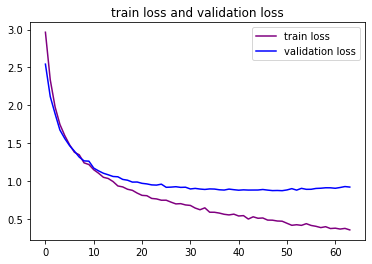

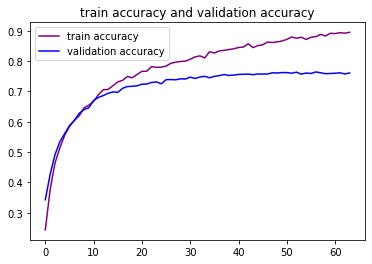

CPU times: user 17min 14s, sys: 4min 15s, total: 21min 29s
Wall time: 21min 25s


In [ ]:

############## train ##############

%%time

# training params

epochs = 64
runno = 128 #1800 #128 #639 #369 # float('inf')
clip = 6 # gradient clipping

# move model to GPU, if available
cla.to(device)

cla.train()
model, lowest_val_loss = home_huffpost + 'huffpost_headline.torm', float('inf')
# train for some number of epochs
loss_train, loss_val = [], []
accuracy_train, accuracy_val = [], []
for e in range(epochs):
    # initialize hidden state
    # h = cla.init_hidden(batch_size) # todo remove me
    # batch loop
    done, total = 0, batch_size * runno + data.get_size_val()
    num_correct_train, num_correct_val = 0.0, 0.0
    report_in_training(e + 1, epochs, done, total)
    c, loss_batch = 0, 0.0
    for X, y in data.get_iter_train():
        if X.shape[0] < data.batch_size: break
        c += 1
        if c > runno: break
        # create new variables for the hidden state, otherwise pytorch would backprop through the entire training history
        h = cla.init_hidden(X.shape[0]) # (h[0].detach(), h[1].detach()) # tuple([each.data for each in h])
        # zero accumulated gradients
        cla.zero_grad()
        # get the output from the model
        q, h = cla(X, h)
        yhat = q.argmax(dim = -1)
        correct_tensor = yhat.eq(y)
        num_correct_train += correct_tensor.sum()
        # calculate the loss and perform backprop
        debug(shape, (q, 'cla.forward output'))
        debug(shape, (y, 'label'))
        loss = criterion(q, y)
        loss_batch += loss.item()
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm_(cla.parameters(), clip)
        optimizer.step()
        done += batch_size
        report_in_training(e + 1, epochs, done, total)
    # loss stats
    loss_train.append(loss_batch / c)
    accuracy_train.append(num_correct_train / (batch_size * runno))
    ################ validation ################
    c, loss_batch = 0, 0.0
    cla.eval()
    for X, y in data.get_iter_val():
        if X.shape[0] < data.batch_size: break
        c += 1
        # if c > runno: break
        # create new variables for the hidden state, otherwise pytorch would backprop through the entire training history
        val_h = cla.init_hidden(X.shape[0]) # tuple([each.data for each in val_h])
        q, val_h = cla(X, val_h)
        yhat = q.argmax(dim = -1)
        correct_tensor = yhat.eq(y)
        num_correct_val += correct_tensor.sum()
        loss = criterion(q, y)
        loss_batch += loss.item()
        done += batch_size
        report_in_training(e + 1, epochs, done, total)
    loss_val.append(loss_batch / c)
    accuracy_val.append(num_correct_val / (data.get_size_val() - data.get_size_val() % data.batch_size))
    cla.train()
    bet = False
    if lowest_val_loss > loss_val[-1]:
        torch.save(cla.state_dict(), model)
        lowest_val_loss = loss_val[-1]
        bet = True
    report_training(e + 1, epochs, loss_train[-1], loss_val[-1], accuracy_train[-1], accuracy_val[-1], bet)

pyplot.figure()
pyplot.title('train loss and validation loss')
pyplot.plot(range(epochs), loss_train, 'purple', label = 'train loss')
pyplot.plot(range(epochs), loss_val, 'blue', label = 'validation loss')
pyplot.legend()

pyplot.show()

pyplot.figure()
pyplot.title('train accuracy and validation accuracy')
pyplot.plot(range(epochs), accuracy_train, 'purple', label = 'train accuracy')
pyplot.plot(range(epochs), accuracy_val, 'blue', label = 'validation accuracy')
pyplot.legend()

pyplot.show()


In [ ]:

############## test ##############

%%time

def test():
    loss_test = [] # track loss
    num_correct = 0.0

    cla = Cla(data.vocab, output_size, hidden_dim, n_layers, bidirectional = True, drop_prob = 0.1)
    cla.load_state_dict(torch.load(model))
    cla.to(device)

    cla.eval()
    # iterate over test data
    for X, y in data.get_iter_test():
        if X.shape[0] < data.batch_size: break
        # if c > runno: break
        # create new variables for the hidden state, otherwise pytorch would backprop through the entire training history
        h = cla.init_hidden(X.shape[0]) # tuple([each.data for each in h])
        # get predicted outputs
        q, h = cla(X, h)
        # compare predictions to true label
        yhat = q.argmax(dim = -1) # there is <oov> category with the index 0 # yhat = q.argsort(dim = -1)[ : , -2]
        correct_tensor = yhat.eq(y)
        num_correct += correct_tensor.sum()
        # calculate loss
        test_loss = criterion(q, y)
        loss_test.append(test_loss.item())

    ######### -- stats! -- #########
    # accuracy over all test data
    accuracy_test = num_correct / (data.get_size_test() - data.get_size_test() % data.batch_size)
    report_test(numpy.mean(loss_test), accuracy_test, accuracy_test > 0.8)

test()


test:	loss =  0.8368, accuracy =  76.63%
CPU times: user 9.25 s, sys: 1.43 s, total: 10.7 s
Wall time: 10.7 s



- try gru instead of lstm


In [ ]:

a = torch.ones(64, 96, 50)
b = torch.full((64, 96), -1, dtype = int)

(a.transpose(0, 2) * b.transpose(0, 1)).transpose(0, 2).shape


torch.Size([64, 96, 50])